In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import models , layers

In [4]:
image_size = 256
batch_size = 32
channel = 3

In [5]:
tf.keras.preprocessing.image_dataset_from_directory?

Signature:
tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory,
labels='inferred')` will return a `tf.data.Dataset` that yields batches of
images from the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: jpeg, png, bmp, gif.
Animated gifs are truncated to the firs

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "plant village",
    shuffle = True,
    batch_size = batch_size,
    image_size = (image_size,image_size)
)

Found 2152 files belonging to 3 classes.


In [7]:
class_name = dataset.class_names

In [8]:
type(class_name)

list

In [9]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
32*68

2176

In [12]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 0 1 0 1 0 1 0 1 1 0 0 2 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 2 0 1]


In [13]:
# check the shape of first image
for image_batch , label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

[[[146. 140. 152.]
  [144. 138. 150.]
  [141. 135. 147.]
  ...
  [146. 140. 152.]
  [147. 141. 153.]
  [147. 141. 153.]]

 [[142. 136. 148.]
  [141. 135. 147.]
  [140. 134. 146.]
  ...
  [147. 141. 153.]
  [147. 141. 153.]
  [148. 142. 154.]]

 [[143. 137. 149.]
  [142. 136. 148.]
  [141. 135. 147.]
  ...
  [148. 142. 154.]
  [148. 142. 154.]
  [149. 143. 155.]]

 ...

 [[103.  97. 111.]
  [106. 100. 114.]
  [100.  94. 108.]
  ...
  [118. 114. 128.]
  [105. 101. 115.]
  [ 99.  95. 109.]]

 [[102.  96. 110.]
  [106. 100. 114.]
  [102.  96. 110.]
  ...
  [109. 105. 119.]
  [105. 101. 115.]
  [ 93.  89. 103.]]

 [[102.  96. 110.]
  [108. 102. 116.]
  [102.  96. 110.]
  ...
  [100.  96. 110.]
  [121. 117. 131.]
  [120. 116. 130.]]]
(256, 256, 3)


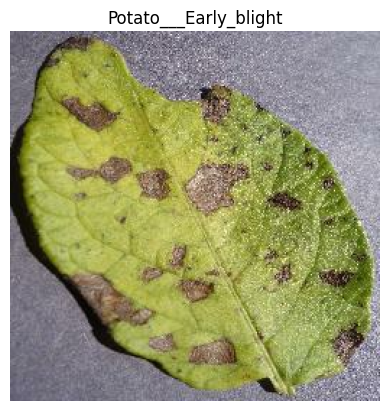

In [14]:
for image_batch , label_batch in dataset.take(1):
    plt.title(class_name[label_batch[0]])
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

In [15]:
for image_batch , label_batch in dataset.take(0):
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

In [16]:
dataset.take?

Signature: dataset.take(count, name=None)
Docstring:
Creates a `Dataset` with at most `count` elements from this dataset.

>>> dataset = tf.data.Dataset.range(10)
>>> dataset = dataset.take(3)
>>> list(dataset.as_numpy_iterator())
[0, 1, 2]

Args:
  count: A `tf.int64` scalar `tf.Tensor`, representing the number of
    elements of this dataset that should be taken to form the new dataset.
    If `count` is -1, or if `count` is greater than the size of this
    dataset, the new dataset will contain all elements of this dataset.
  name: (Optional.) A name for the tf.data operation.

Returns:
  A new `Dataset` with the transformation applied as described above.
File:      c:\users\izhar\appdata\local\programs\python\python310\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py
Type:      method

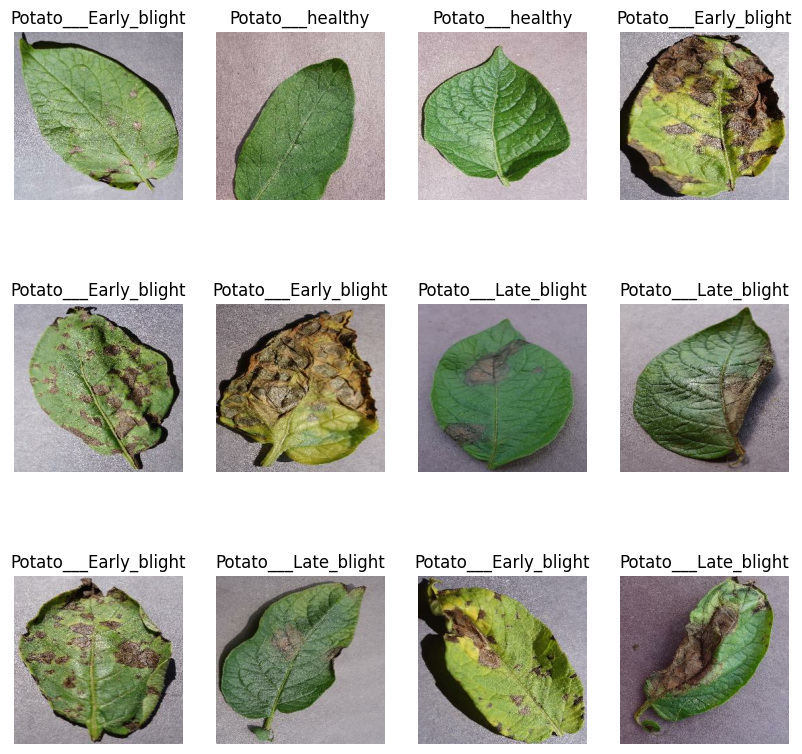

In [17]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax =  plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In [18]:
# Splitting Datasets into train , test and validation

In [19]:
len(dataset)*0.8 #==========> training dataset

54.400000000000006

In [20]:
training_ds = dataset.take(54)

In [21]:
len(training_ds)

54

In [22]:
len(dataset)*0.10

6.800000000000001

In [23]:
test_ds = dataset.take(7)

In [24]:
int(len(dataset)*0.10)

6

In [25]:
validation_ds = dataset.take(5)

In [26]:
# so wrap it up by defining function

def Train_test_Validation_split(df_dataset,train_split = 0.8,test_split = 0.10,validation_split = 0.10,shuffle = True,shuffle_size = 10000):
    if shuffle:
        df_dataset.shuffle(shuffle_size,seed =12)
    data =  df_dataset
    train_size =  int(len(data)*train_split)
    test_size = int(len(data)*test_split)
    val_split = int(len(data)*validation_split)
    return df_dataset.take(train_size),df_dataset.take(test_size),df_dataset.take(val_split)

In [27]:
train,test,validation = Train_test_Validation_split(dataset)

In [28]:
type(train)

tensorflow.python.data.ops.take_op._TakeDataset

In [29]:
len(train)

54

In [30]:
len(test)

6

In [31]:
len(validation)

6

In [32]:
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation = validation.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [33]:
resizing_and_Scaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
])

In [34]:
# Data Augmentation

flip_and_rotation = tf.keras.Sequential( [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [35]:
layers.Conv2D?

Init signature:
layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers or `None`, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `dat

In [36]:
layers.MaxPooling2D?

Init signature:
layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs,
)
Docstring:     
Max pooling operation for 2D spatial data.

Downsamples the input along its spatial dimensions (height and width)
by taking the maximum value over an input window
(of size defined by `pool_size`) for each channel of the input.
The window is shifted by `strides` along each dimension.

The resulting output,
when using the `"valid"` padding option, has a spatial shape
(number of rows or columns) of:
`output_shape = math.floor((input_shape - pool_size) / strides) + 1`
(when `input_shape >= pool_size`)

The resulting output shape when using the `"same"` padding option is:
`output_shape = math.floor((input_shape - 1) / strides) + 1`

For example, for `strides=(1, 1)` and `padding="valid"`:

>>> x = tf.constant([[1., 2., 3.],
...                  [4., 5., 6.],
...                  [7., 8., 9.]])
>>> x = tf.reshape(x, [1, 3, 3, 1])
>>> max_pool

In [37]:
## making Convolutional Neural Network

input_shape = (batch_size,image_size,image_size,channel)
model = models.Sequential([
    resizing_and_Scaling,
    flip_and_rotation,
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(len(class_name),activation='softmax')
])


In [38]:
model.build(input_shape = input_shape)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [40]:
#model compile

model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False),metrics = ['accuracy'])

In [41]:
## Fit the Model

history_check_per_epoch =  model.fit(train,epochs = 50,batch_size =  batch_size,verbose = 1, validation_data = validation)

Epoch 1/50
54/54 [==============================] - 150s 3s/step - loss: 0.8337 - accuracy: 0.5891 - val_loss: 0.6353 - val_accuracy: 0.7031
Epoch 2/50
54/54 [==============================] - 133s 2s/step - loss: 0.4863 - accuracy: 0.7905 - val_loss: 0.3333 - val_accuracy: 0.8646
Epoch 3/50
54/54 [==============================] - 133s 2s/step - loss: 0.3359 - accuracy: 0.8542 - val_loss: 0.3324 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 134s 2s/step - loss: 0.2378 - accuracy: 0.8976 - val_loss: 0.2326 - val_accuracy: 0.8958
Epoch 5/50
54/54 [==============================] - 137s 3s/step - loss: 0.2534 - accuracy: 0.9022 - val_loss: 0.2483 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 140s 3s/step - loss: 0.2018 - accuracy: 0.9230 - val_loss: 0.1787 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 148s 3s/step - loss: 0.1992 - accuracy: 0.9172 - val_loss: 0.1692 - val_accuracy: 0.9375
Epoch 8/50
54

In [42]:
score = model.evaluate(test)

6/6 [==============================] - 6s 715ms/step - loss: 0.0662 - accuracy: 0.9688


In [43]:
score ## first parameter is loss and second is Accuracy...

[0.06622345000505447, 0.96875]

In [44]:
score[0] # loss 

0.06622345000505447

In [45]:
score[1] # Accuracy Perameter...

0.96875

In [46]:
history_check_per_epoch

In [47]:
history_check_per_epoch.params?

Type:        dict
String form: {'verbose': 1, 'epochs': 50, 'steps': 54}
Length:      3
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)

In [48]:
history_check_per_epoch.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [49]:
history_check_per_epoch.set_model

<bound method Callback.set_model of <keras.src.callbacks.History object at 0x000001DEE35D9BD0>>

In [50]:
history_check_per_epoch.set_model?

Signature: history_check_per_epoch.set_model(model)
Docstring: <no docstring>
File:      c:\users\izhar\appdata\local\programs\python\python310\lib\site-packages\keras\src\callbacks.py
Type:      method

In [51]:
history_check_per_epoch.history["accuracy"]

[0.5891203880310059,
 0.7905092835426331,
 0.8541666865348816,
 0.8975694179534912,
 0.9021990895271301,
 0.9230324029922485,
 0.9172453880310059,
 0.9444444179534912,
 0.9398148059844971,
 0.9594907164573669,
 0.9618055820465088,
 0.9444444179534912,
 0.9722222089767456,
 0.9606481194496155,
 0.9728009104728699,
 0.9346064925193787,
 0.9658564925193787,
 0.9814814925193787,
 0.9670138955116272,
 0.9716435074806213,
 0.9704861044883728,
 0.9785879850387573,
 0.984375,
 0.9918981194496155,
 0.9913194179534912,
 0.9745370149612427,
 0.9866898059844971,
 0.9861111044883728,
 0.9826388955116272,
 0.9826388955116272,
 0.9814814925193787,
 0.9837962985038757,
 0.984375,
 0.9878472089767456,
 0.9814814925193787,
 0.9878472089767456,
 0.9890046119689941,
 0.9890046119689941,
 0.9866898059844971,
 0.9930555820465088,
 0.9866898059844971,
 0.9872685074806213,
 0.9832175970077515,
 0.9895833134651184,
 0.9959490895271301,
 0.9803240895271301,
 0.9901620149612427,
 0.9942129850387573,
 0.975694417

In [52]:
np.mean(history_check_per_epoch.history["accuracy"])

0.9582754600048066

In [53]:
np.median(history_check_per_epoch.history["accuracy"])

0.9814814925193787

In [54]:
## get the accuracy and validation score and plot them
accuracy = history_check_per_epoch.history['accuracy']
val_accuracy = history_check_per_epoch.history['val_accuracy']
loss = history_check_per_epoch.history['loss']
val_loss = history_check_per_epoch.history['val_loss']

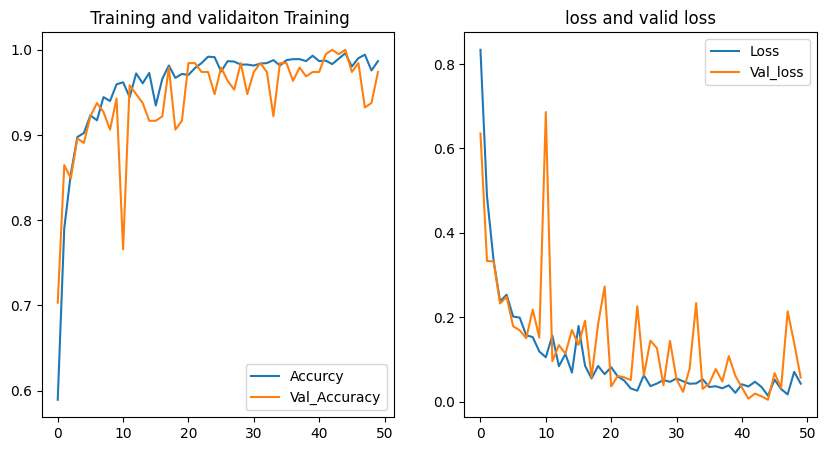

In [55]:
EPOCHS = 50
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy, label = "Accurcy")
plt.plot(range(EPOCHS),val_accuracy, label = "Val_Accuracy")
plt.legend(loc = 'lower right')
plt.title(" Training and validaiton Training")
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label ="Loss")
plt.plot(range(EPOCHS),val_loss, label = "Val_loss")
plt.legend(loc = 'upper right')
plt.title('loss and valid loss')
plt.show()

tf.Tensor(
[[[166. 164. 178.]
  [167. 165. 179.]
  [159. 157. 171.]
  ...
  [131. 127. 141.]
  [125. 121. 135.]
  [141. 137. 151.]]

 [[160. 158. 172.]
  [157. 155. 169.]
  [156. 154. 168.]
  ...
  [142. 138. 152.]
  [133. 129. 143.]
  [143. 139. 153.]]

 [[167. 165. 179.]
  [159. 157. 171.]
  [158. 156. 170.]
  ...
  [140. 136. 150.]
  [123. 119. 133.]
  [127. 123. 137.]]

 ...

 [[187. 184. 195.]
  [187. 184. 195.]
  [185. 182. 193.]
  ...
  [168. 165. 174.]
  [154. 151. 160.]
  [142. 139. 148.]]

 [[185. 182. 193.]
  [187. 184. 195.]
  [185. 182. 193.]
  ...
  [145. 142. 151.]
  [157. 154. 163.]
  [151. 148. 157.]]

 [[183. 180. 191.]
  [186. 183. 194.]
  [185. 182. 193.]
  ...
  [141. 138. 147.]
  [151. 148. 157.]
  [151. 148. 157.]]], shape=(256, 256, 3), dtype=float32)


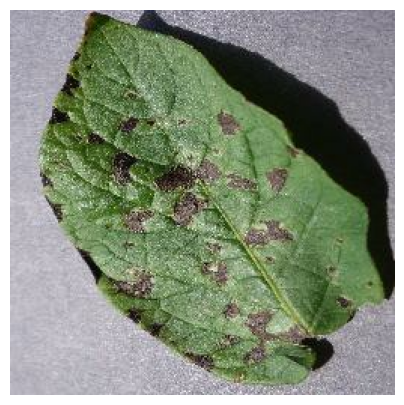

In [56]:
## now we are going to test our model, so let Load the test data
plt.figure(figsize=(5,5))
for image_batch,label_batch in test_ds.take(1):
    print(image_batch[0])
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis("off")
    plt.show()

printing the first image
The Actual Disease is :Potato___healthy
Predicting>>>>>>>>>>>>>>
1/1 [==============================] - 2s 2s/step
2
pred Disease is Potato___healthy


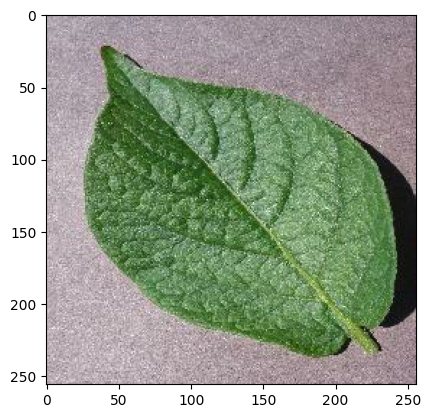

In [57]:
for image_batch, label_batch in test.take(1):
    print("printing the first image")
    print(f"The Actual Disease is :{class_name[label_batch[0]]}")
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("Predicting>>>>>>>>>>>>>>")
    prediction_batch = model.predict(image_batch)
    pred_img = np.argmax(prediction_batch[0])
    print(pred_img)
    print(f"pred Disease is {class_name[pred_img]}")
    

In [58]:
def image_prediction(model,image):
    image_array = tf.keras.preprocessing.image.img_to_array(image)
        # creating batch size
    batch_img = tf.expand_dims(image_array,0)
    predictions = model.predict(batch_img)
    
    pred_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return pred_class,confidence

1/1 [==============================] - 0s 104ms/step


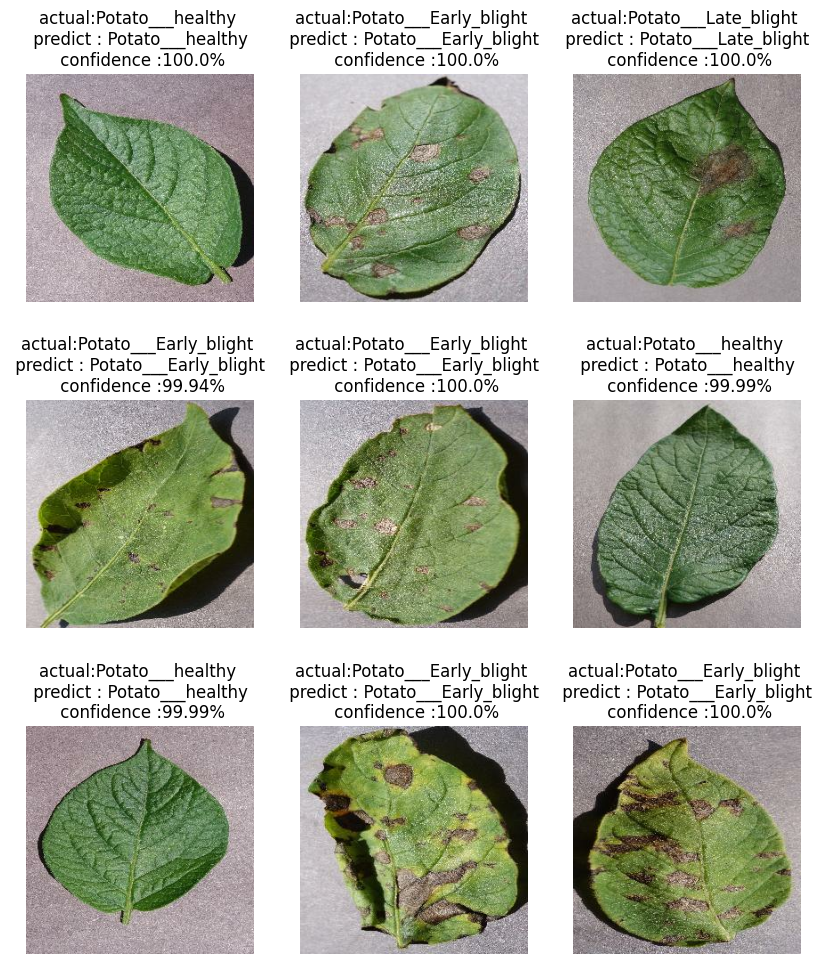

In [59]:
plt.figure(figsize=(10,12))
for batch_img ,label_img in test.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(batch_img[i].numpy().astype('uint8'))
        
        pred_class,confidence = image_prediction(model,batch_img[i].numpy())
        plt.title(f"actual:{class_name[label_img[i]]} \n predict : {pred_class} \n confidence :{confidence}%")
        plt.axis("off")
    plt.show()

In [60]:
model_version = 1
model.save(f"../Models/{model_version}")

INFO:tensorflow:Assets written to: ../Models/1\assets


INFO:tensorflow:Assets written to: ../Models/1\assets
